In [23]:
# import libraries
# ================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable

In [24]:
url = 'https://www.mohfw.gov.in/'

In [25]:
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

In [26]:
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

In [28]:
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]

In [55]:
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')

In [58]:
for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)

In [59]:
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

In [60]:
# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

In [61]:
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']),
               sum(state_data['Deceased'])])
print(table)

+-------+-----------+-----------+-----------+----------+
| Sr.No | States/UT | Confirmed | Recovered | Deceased |
+-------+-----------+-----------+-----------+----------+
|       |   Total   |     0     |     0     |    0     |
+-------+-----------+-----------+-----------+----------+


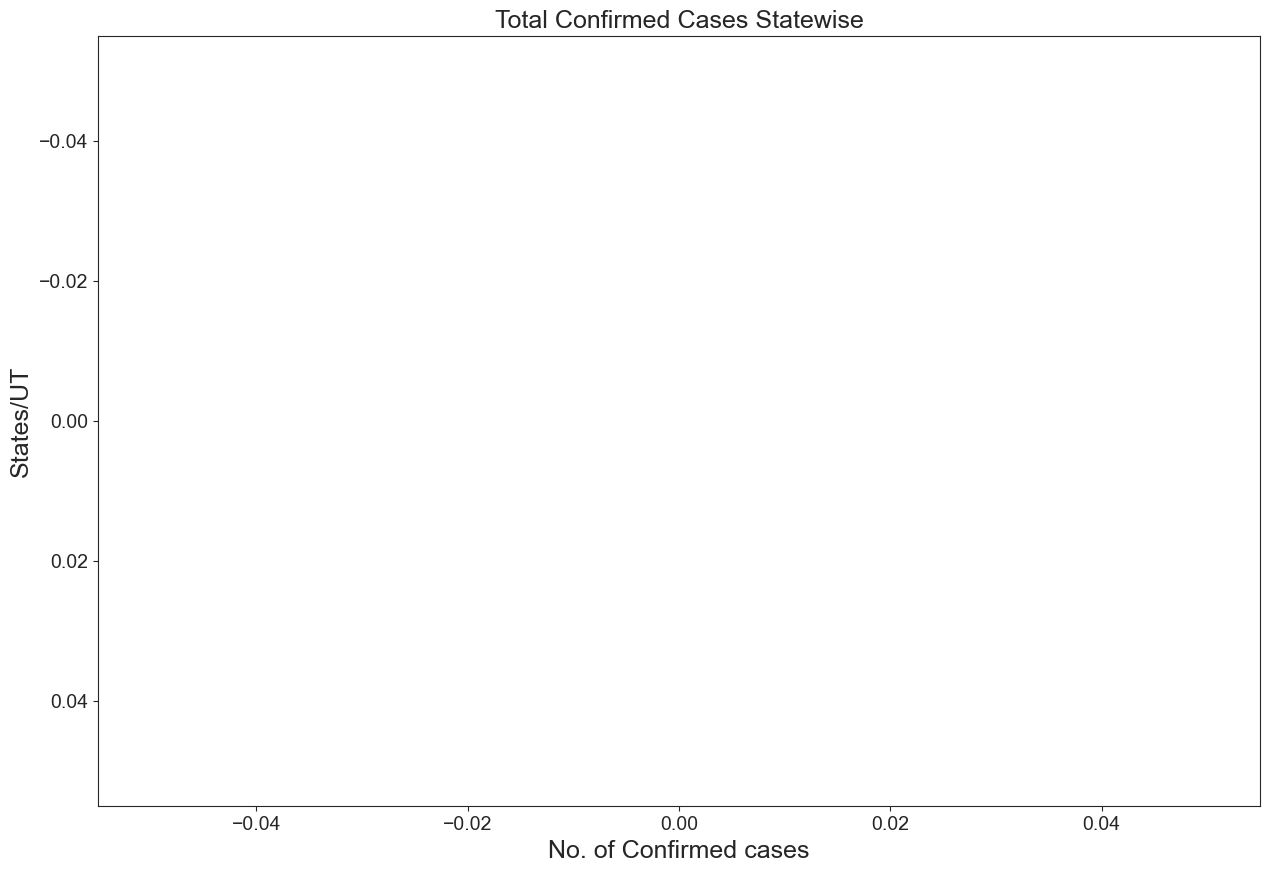

In [52]:
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"],    state_data["Confirmed"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()